## [Viewing 3D Volumetric Data With Matplotlib](https://www.datacamp.com/community/tutorials/matplotlib-3d-volumetric-data)

In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
from skimage import data

In [5]:
astronaut = data.astronaut()
ihc = data.immunohistochemistry()
hubble = data.hubble_deep_field()

<IPython.core.display.Javascript object>


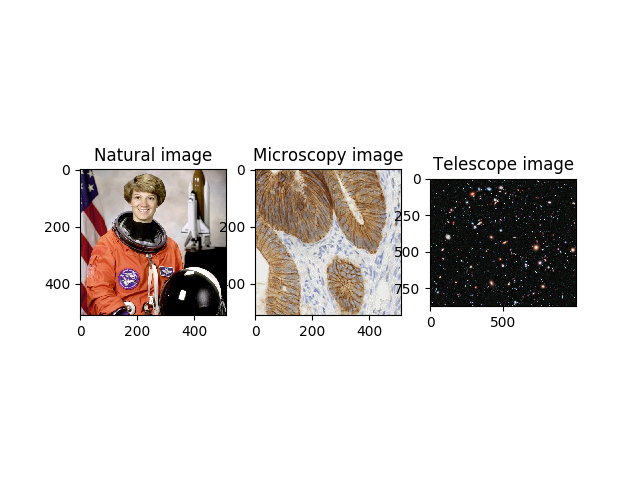

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=3)

ax[0].imshow(astronaut)
ax[0].set_title('Natural image')
ax[1].imshow(ihc)
ax[1].set_title('Microscopy image')
ax[2].imshow(hubble)
ax[2].set_title('Telescope image');

In [11]:
import tempfile
d = tempfile.mkdtemp()
d

'/tmp/tmpw5384kbf'

In [12]:
import os
os.path.basename('http://google.com/attention.zip')

'attention.zip'

In [13]:
from urllib.request import urlretrieve

url = 'http://www.fil.ion.ucl.ac.uk/spm/download/data/attention/attention.zip'
fn, info = urlretrieve(url, os.path.join(d, 'attention.zip'))

In [14]:
import zipfile
zipfile.ZipFile(fn).extractall(path=d)

In [15]:
[f.filename for f in zipfile.ZipFile(fn).filelist[:10]]

['attention/',
 'attention/multi_block_regressors.mat',
 'attention/README_DATA.txt',
 'attention/factors.mat',
 'attention/functional/',
 'attention/functional/snffM00587_0201.hdr',
 'attention/functional/snffM00587_0040.img',
 'attention/functional/snffM00587_0458.hdr',
 'attention/functional/snffM00587_0185.img',
 'attention/functional/snffM00587_0018.hdr']

In [18]:
import nibabel

In [19]:
# Read the image 
struct = nibabel.load(os.path.join(d, 'attention/structural/nsM00587_0002.hdr'))

# Get a plain NumPy array, without all the metadata
struct_arr = struct.get_data()

In [20]:
from skimage import io

struct_arr = io.imread("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/attention-mri.tif")

<IPython.core.display.Javascript object>


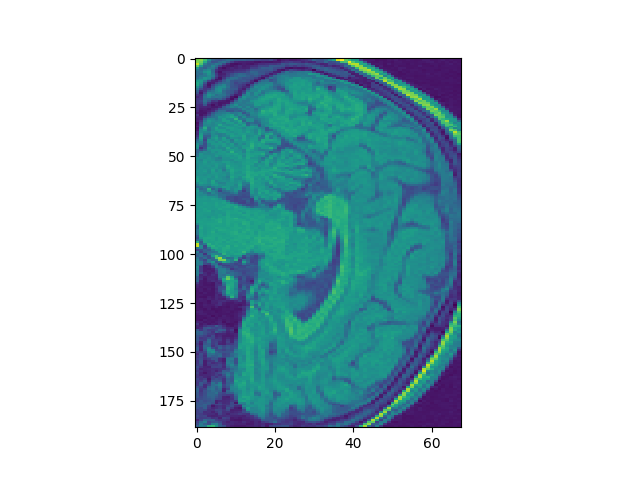

In [27]:
plt.imshow(struct_arr[75], aspect=0.5);

<IPython.core.display.Javascript object>


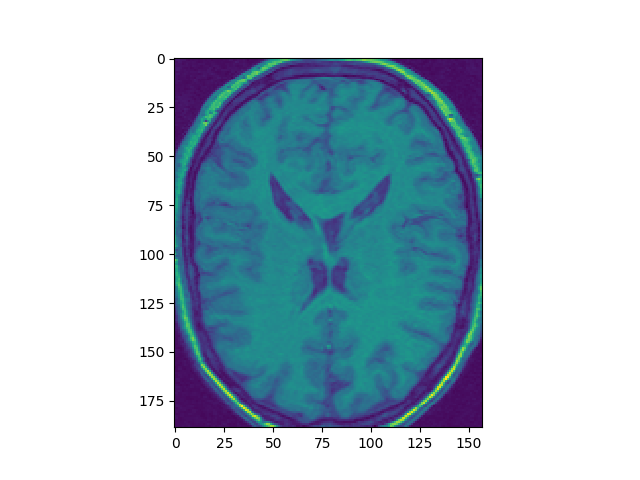

In [28]:
struct_arr2 = struct_arr.T
plt.imshow(struct_arr2[34]);

<IPython.core.display.Javascript object>


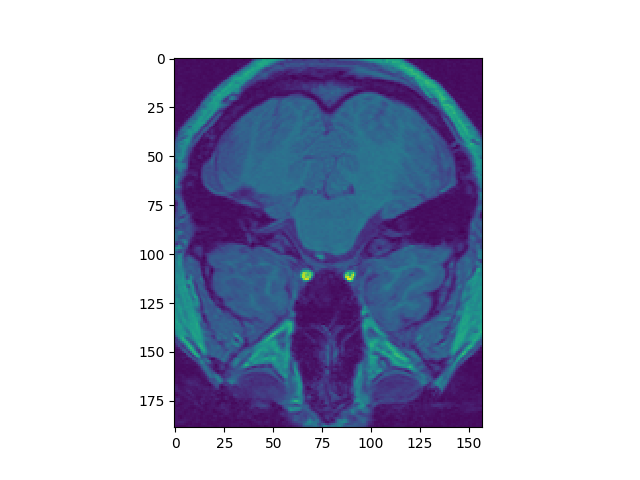

In [30]:
plt.imshow(struct_arr2[5]);

In [34]:
def remove_keymap_conflicts(new_keys_set):
    for prop in plt.rcParams:
        if prop.startswith('keymap.'):
            keys = plt.rcParams[prop]
            remove_list = set(keys) & new_keys_set
            for key in remove_list:
                keys.remove(key)

In [35]:
def multi_slice_viewer(volume):
    remove_keymap_conflicts({'j', 'k'})
    fig, ax = plt.subplots()
    ax.volume = volume
    ax.index = volume.shape[0] // 2
    ax.imshow(volume[ax.index])
    fig.canvas.mpl_connect('key_press_event', process_key)

def process_key(event):
    fig = event.canvas.figure
    ax = fig.axes[0]
    if event.key == 'j':
        previous_slice(ax)
    elif event.key == 'k':
        next_slice(ax)
    fig.canvas.draw()

def previous_slice(ax):
    """Go to the previous slice."""
    volume = ax.volume
    ax.index = (ax.index - 1) % volume.shape[0]  # wrap around using %
    ax.images[0].set_array(volume[ax.index])

def next_slice(ax):
    """Go to the next slice."""
    volume = ax.volume
    ax.index = (ax.index + 1) % volume.shape[0]
    ax.images[0].set_array(volume[ax.index])

<IPython.core.display.Javascript object>


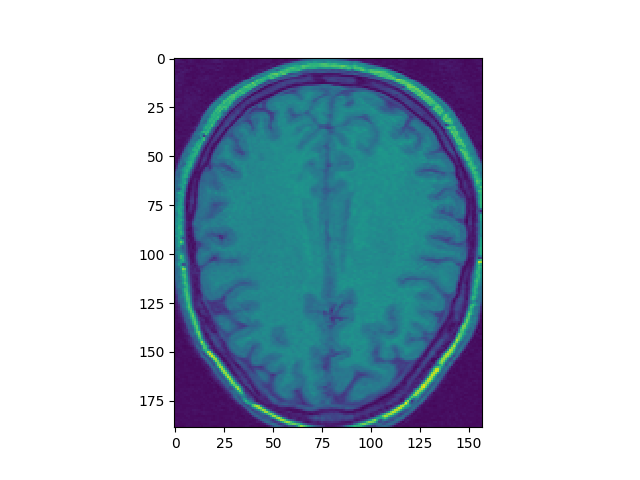

In [38]:
multi_slice_viewer(struct_arr2);

In [37]:
import shutil

# Remove the temporary directory
shutil.rmtree(d)